# 1. Data Source and Contents

In [63]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
url = "https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true"
df = pd.read_csv(url)

##### Q.1 Why does it makes sense to discretize columns for this problem?

When you discretize a column, you change a continuous variable into a categorical variable in which the values are categorized or sorted into bins. This can facilitate working with and interpreting the data, particularly for algorithms like decision trees. Some continuous columns in the dataset provided were discretized through binning to make them more suitable for use in a decision tree algorithm.

##### Q.2 What might be the issues (if any) if we DID NOT discretize the columns.

Not discretizing the columns in the provided dataset can lead to overfitting, increased computational complexity, and poor generalization when using decision tree algorithms. Discretizing the continuous variables can make the data more interpretable, reduce the number of splits required, and allow the algorithm to find more generalizable rules.

# 2. Data Quality Analysis (DQA)

Perform a Data Quality Analysis to find missing values, outliers, NaNs etc.

Display descriptive statistics of each column

Create a Data Quality Report

Perform necessary data cleansing and transformation based on your observations from the data quality analysis

In [65]:
## Print first few rows
print(df.head())

  hours_per_week_bin occupation_bin  msr_bin capital_gl_bin race_sex_bin  \
0           b. 31-40   b. Mid - Low   b. Mid         c. > 0      c. High   
1            a. 0-30        e. High  c. High         a. = 0      c. High   
2           b. 31-40         a. Low   b. Mid         a. = 0      c. High   
3           b. 31-40         a. Low  c. High         a. = 0       b. Mid   
4           b. 31-40        e. High  c. High         a. = 0       a. Low   

  education_num_bin education_bin workclass_bin            age_bin   flag  y  
0             c. 13  c. Bachelors     b. income   d. 36-40 & 56-60  train  0  
1             c. 13  c. Bachelors     b. income           e. 40-55  train  0  
2           b. 9-12        b. Mid     b. income   d. 36-40 & 56-60  train  0  
3            a. 0-8        a. Low     b. income           e. 40-55  train  0  
4             c. 13  c. Bachelors     b. income  b. 26-30 & 71-100  train  0  


In [66]:
## print the DataFrame's shape
print(df.shape)

(48842, 11)


In [67]:
## print the DataFrame's data types
pd.set_option('display.max_rows', None)
#pd.reset_option('max_rows')
print(df.dtypes)

hours_per_week_bin    object
occupation_bin        object
msr_bin               object
capital_gl_bin        object
race_sex_bin          object
education_num_bin     object
education_bin         object
workclass_bin         object
age_bin               object
flag                  object
y                      int64
dtype: object


In [68]:
## check for missing values
print(df.isnull().sum())

hours_per_week_bin    0
occupation_bin        0
msr_bin               0
capital_gl_bin        0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64


In [37]:
# ENCODE CATEGORICAL VARIABLES TO NUMERICAL DUMMY COLUMNS -- mandatory before using ScikitLearn

In [69]:
cols = ['hours_per_week_bin', 'occupation_bin','msr_bin','capital_gl_bin','race_sex_bin','education_num_bin','education_bin','workclass_bin','age_bin']
df_encoded = pd.get_dummies(df,columns = cols)

In [70]:
df_encoded.head()

,flag,y,hours_per_week_bin_a. 0-30,hours_per_week_bin_b. 31-40,hours_per_week_bin_c. 71-100,hours_per_week_bin_d. 41-50 & 61-70,hours_per_week_bin_e. 51-60,occupation_bin_a. Low,occupation_bin_b. Mid - Low,occupation_bin_c. Mid - Mid,...,education_bin_c. Bachelors,education_bin_d. Masters,education_bin_e. High,workclass_bin_a. no income,workclass_bin_b. income,age_bin_a. 0-25,age_bin_b. 26-30 & 71-100,age_bin_c. 31-35 & 61-70,age_bin_d. 36-40 & 56-60,age_bin_e. 40-55
0,train,0,0,1,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
1,train,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
2,train,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
3,train,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
4,train,0,0,1,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0


In [72]:
#Split Data
train= df_encoded.loc[df_encoded.flag == 'train']
train.head()

,flag,y,hours_per_week_bin_a. 0-30,hours_per_week_bin_b. 31-40,hours_per_week_bin_c. 71-100,hours_per_week_bin_d. 41-50 & 61-70,hours_per_week_bin_e. 51-60,occupation_bin_a. Low,occupation_bin_b. Mid - Low,occupation_bin_c. Mid - Mid,...,education_bin_c. Bachelors,education_bin_d. Masters,education_bin_e. High,workclass_bin_a. no income,workclass_bin_b. income,age_bin_a. 0-25,age_bin_b. 26-30 & 71-100,age_bin_c. 31-35 & 61-70,age_bin_d. 36-40 & 56-60,age_bin_e. 40-55
0,train,0,0,1,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
1,train,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
2,train,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
3,train,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
4,train,0,0,1,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0


In [71]:
test= df_encoded.loc[df_encoded.flag == 'test']
test.head()

,flag,y,hours_per_week_bin_a. 0-30,hours_per_week_bin_b. 31-40,hours_per_week_bin_c. 71-100,hours_per_week_bin_d. 41-50 & 61-70,hours_per_week_bin_e. 51-60,occupation_bin_a. Low,occupation_bin_b. Mid - Low,occupation_bin_c. Mid - Mid,...,education_bin_c. Bachelors,education_bin_d. Masters,education_bin_e. High,workclass_bin_a. no income,workclass_bin_b. income,age_bin_a. 0-25,age_bin_b. 26-30 & 71-100,age_bin_c. 31-35 & 61-70,age_bin_d. 36-40 & 56-60,age_bin_e. 40-55
32561,test,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0
32562,test,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
32563,test,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
32564,test,1,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
32565,test,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0


In [73]:
train = train.drop('flag', axis=1)

In [74]:
train.head()

,y,hours_per_week_bin_a. 0-30,hours_per_week_bin_b. 31-40,hours_per_week_bin_c. 71-100,hours_per_week_bin_d. 41-50 & 61-70,hours_per_week_bin_e. 51-60,occupation_bin_a. Low,occupation_bin_b. Mid - Low,occupation_bin_c. Mid - Mid,occupation_bin_d. Mid - High,...,education_bin_c. Bachelors,education_bin_d. Masters,education_bin_e. High,workclass_bin_a. no income,workclass_bin_b. income,age_bin_a. 0-25,age_bin_b. 26-30 & 71-100,age_bin_c. 31-35 & 61-70,age_bin_d. 36-40 & 56-60,age_bin_e. 40-55
0,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0


In [75]:
test = test.drop('flag', axis=1)

In [76]:
test.head()

,y,hours_per_week_bin_a. 0-30,hours_per_week_bin_b. 31-40,hours_per_week_bin_c. 71-100,hours_per_week_bin_d. 41-50 & 61-70,hours_per_week_bin_e. 51-60,occupation_bin_a. Low,occupation_bin_b. Mid - Low,occupation_bin_c. Mid - Mid,occupation_bin_d. Mid - High,...,education_bin_c. Bachelors,education_bin_d. Masters,education_bin_e. High,workclass_bin_a. no income,workclass_bin_b. income,age_bin_a. 0-25,age_bin_b. 26-30 & 71-100,age_bin_c. 31-35 & 61-70,age_bin_d. 36-40 & 56-60,age_bin_e. 40-55
32561,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0
32562,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
32563,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0
32564,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
32565,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0


In [41]:
# PREPARE FOR MACHINE LEARNING (ScikitLearn)

In [78]:
X_train = train.drop('y', axis=1)
y_train = train['y']

In [79]:
X_test = train.drop('y', axis=1)
y_test = train['y']

# 3. Build Decision Tree Classifier Models

In [48]:
# NOW SELECT ML ALGORITHM

In [56]:
# ALGORITHM: DECISION TREE

In [91]:
# Fit a decision tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=3,random_state=101,max_features=None)
dtree = dtree.fit(X_train, y_train)
y_pred=dtree.predict(X_test)

In [92]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# check for the sklearn version
import sklearn
print(sklearn.__version__)

1.0.2


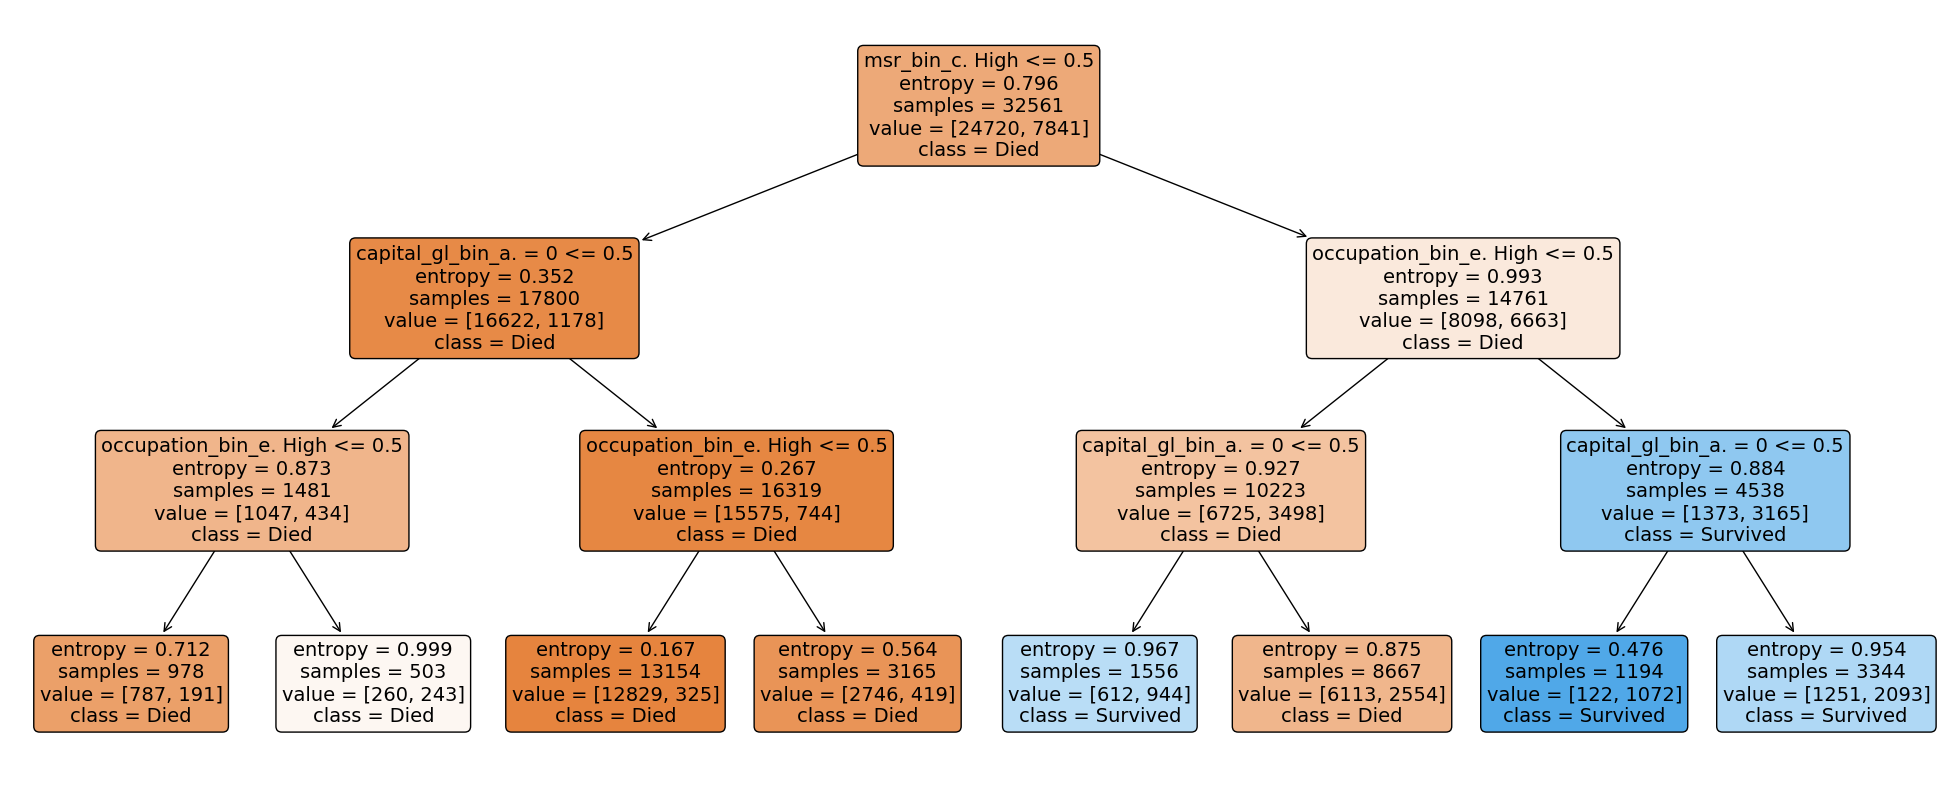

In [94]:
plt.figure(figsize=(25,10))
a = plot_tree(dtree, feature_names=list(X_train), class_names=['Died', 'Survived'], 
              filled=True, rounded=True, fontsize=14)

# 4. Evaluate Decision Tree Performance

### Confusion Matrix

In [95]:
from sklearn.metrics import confusion_matrix
Y_pred = dtree.predict (X_test)
cm = confusion_matrix(y_test, Y_pred)
print (cm)

#rows represent the the rows represent the actual class Labels, and the columns represent the predicted class labels.

[[22735  1985]
 [ 3732  4109]]


### Accuracy, Precision, Recall, F1 Score

In [98]:
# Predict the target values for the test set
Y_pred = dtree.predict (X_test)

# Evaluate the performance of the model
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Predict the target values for the test set
Y_pred = dtree.predict (X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, Y_pred)
print("Accuracy:", accuracy)

# Calculate the F1 score of the model
f1 = f1_score(y_test, Y_pred, average= 'weighted')
print ("F1 score:", f1)

# Calculate the precision of the model
precision = precision_score(y_test, Y_pred, average='weighted')
print("Precision:", precision)

# Calculate the recall of the model
recall = recall_score(y_test, Y_pred, average= 'weighted')
print("Recall:", recall)

Accuracy: 0.8244218543656522
F1 score: 0.8164121532311834
Precision: 0.8145108072054575
Recall: 0.8244218543656522


In [100]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support

accuracy_score(y_test,Y_pred) # accuracy score

# Printing classifier report after prediction
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89     24720
           1       0.67      0.52      0.59      7841

    accuracy                           0.82     32561
   macro avg       0.77      0.72      0.74     32561
weighted avg       0.81      0.82      0.82     32561



In [101]:
# CALCULATE and PRINT AUC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve

0.7218704741156043


C:\Users\diego.barrera\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


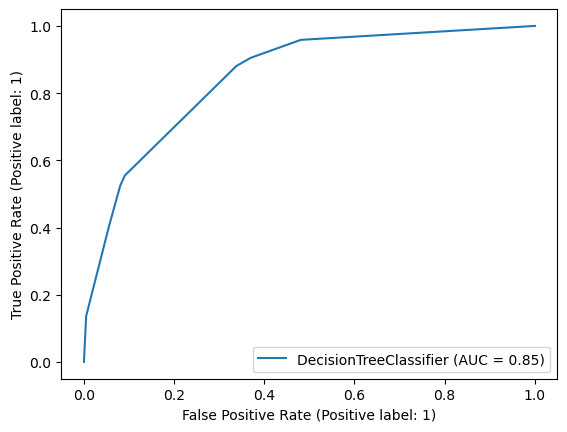

In [104]:
#print roc score 
test_auc = roc_auc_score(y_test, Y_pred)
#ROC AUC Curve
plot_roc_curve(t, X_test, y_test)

print(test_auc)

Four Hyperparameters to vary:

• Split Criteria – ‘Entropy’ or ‘Gini Impurity’

• Maximum Features – The number of features to consider when looking for the best
split. If float, then max_features is a fraction
and max(1, int(max_features * n_features_in_)) features are considered at each split.

• Minimum Sample Leaf – Minimum of samples in a leaf node to stop further splitting
(becomes a leaf node)

• Maximum Depth – Maximum depth of the tree allowed

1.0.2


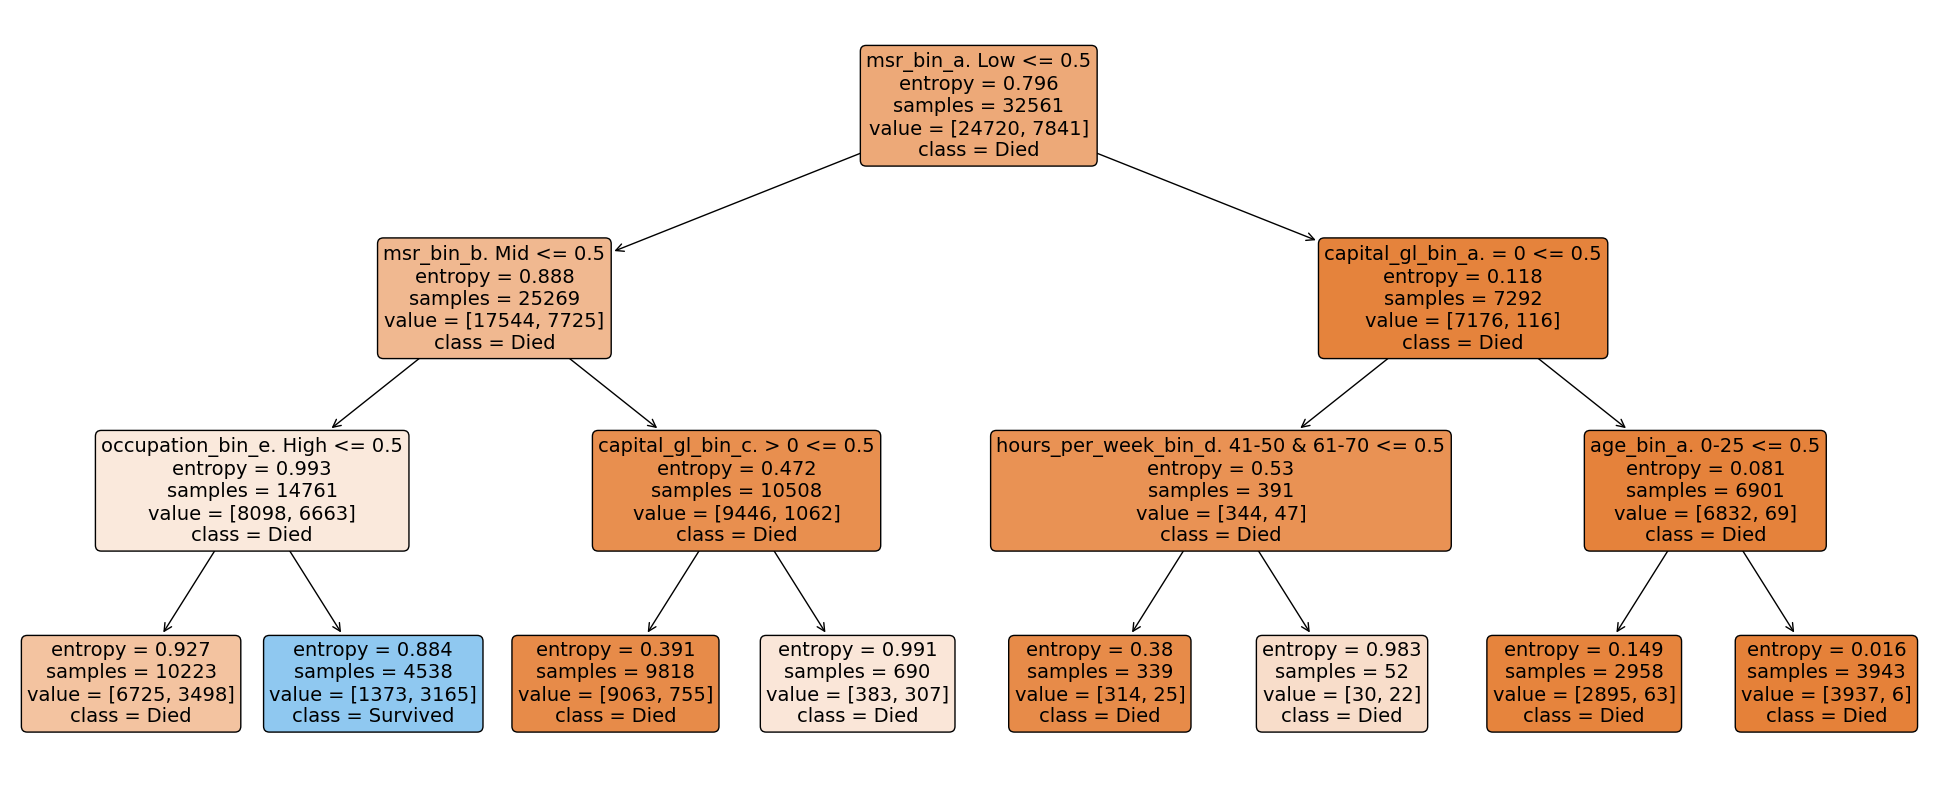

In [114]:
#Maximum Features

# Fit a decision tree with max_features=0.5
#from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=3,random_state=101,max_features=0.5)
dtree = dtree.fit(X_train, y_train)
y_pred=dtree.predict(X_test)

#from sklearn.tree import plot_tree
#import matplotlib.pyplot as plt

# check for the sklearn version
#import sklearn
print(sklearn.__version__)

plt.figure(figsize=(25,10))
a = plot_tree(dtree, feature_names=list(X_train), class_names=['Died', 'Survived'], 
              filled=True, rounded=True, fontsize=14)

In [115]:
from sklearn.metrics import confusion_matrix
Y_pred = dtree.predict (X_test)
cm = confusion_matrix(y_test, Y_pred)
print (cm)


# Predict the target values for the test set
Y_pred = dtree.predict (X_test)

# Evaluate the performance of the model
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Predict the target values for the test set
Y_pred = dtree.predict (X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, Y_pred)
print("Accuracy:", accuracy)

# Calculate the F1 score of the model
f1 = f1_score(y_test, Y_pred, average= 'weighted')
print ("F1 score:", f1)

# Calculate the precision of the model
precision = precision_score(y_test, Y_pred, average='weighted')
print("Precision:", precision)

# Calculate the recall of the model
recall = recall_score(y_test, Y_pred, average= 'weighted')
print("Recall:", recall)


[[23347  1373]
 [ 4676  3165]]
Accuracy: 0.8142256073216425
F1 score: 0.7952581884937207
Precision: 0.8004608325412194
Recall: 0.8142256073216425


1.0.2


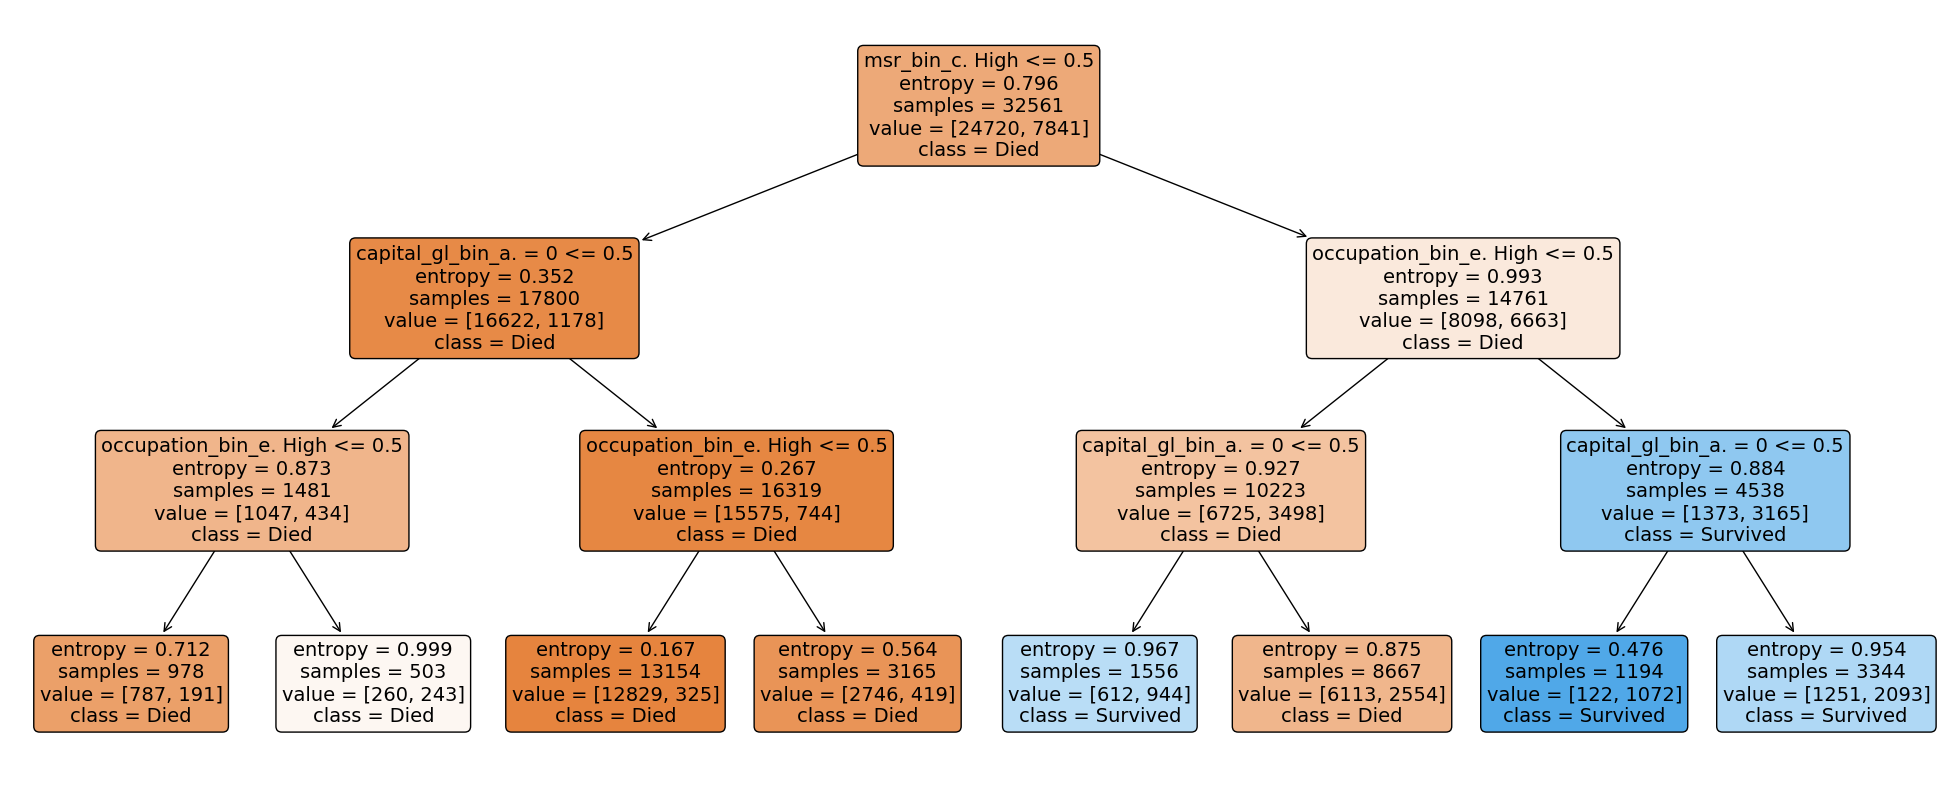

In [116]:
#Minimum Sample Leaf 

# Fit a decision tree with max_features=0.5
#from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=101, max_features=None, min_samples_leaf=5)
dtree = dtree.fit(X_train, y_train)
y_pred=dtree.predict(X_test)

#from sklearn.tree import plot_tree
#import matplotlib.pyplot as plt

# check for the sklearn version
#import sklearn
print(sklearn.__version__)

plt.figure(figsize=(25,10))
a = plot_tree(dtree, feature_names=list(X_train), class_names=['Died', 'Survived'], 
              filled=True, rounded=True, fontsize=14)

In [117]:
from sklearn.metrics import confusion_matrix
Y_pred = dtree.predict (X_test)
cm = confusion_matrix(y_test, Y_pred)
print (cm)


# Predict the target values for the test set
Y_pred = dtree.predict (X_test)

# Evaluate the performance of the model
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Predict the target values for the test set
Y_pred = dtree.predict (X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, Y_pred)
print("Accuracy:", accuracy)

# Calculate the F1 score of the model
f1 = f1_score(y_test, Y_pred, average= 'weighted')
print ("F1 score:", f1)

# Calculate the precision of the model
precision = precision_score(y_test, Y_pred, average='weighted')
print("Precision:", precision)

# Calculate the recall of the model
recall = recall_score(y_test, Y_pred, average= 'weighted')
print("Recall:", recall)


[[22735  1985]
 [ 3732  4109]]
Accuracy: 0.8244218543656522
F1 score: 0.8164121532311834
Precision: 0.8145108072054575
Recall: 0.8244218543656522


1.0.2


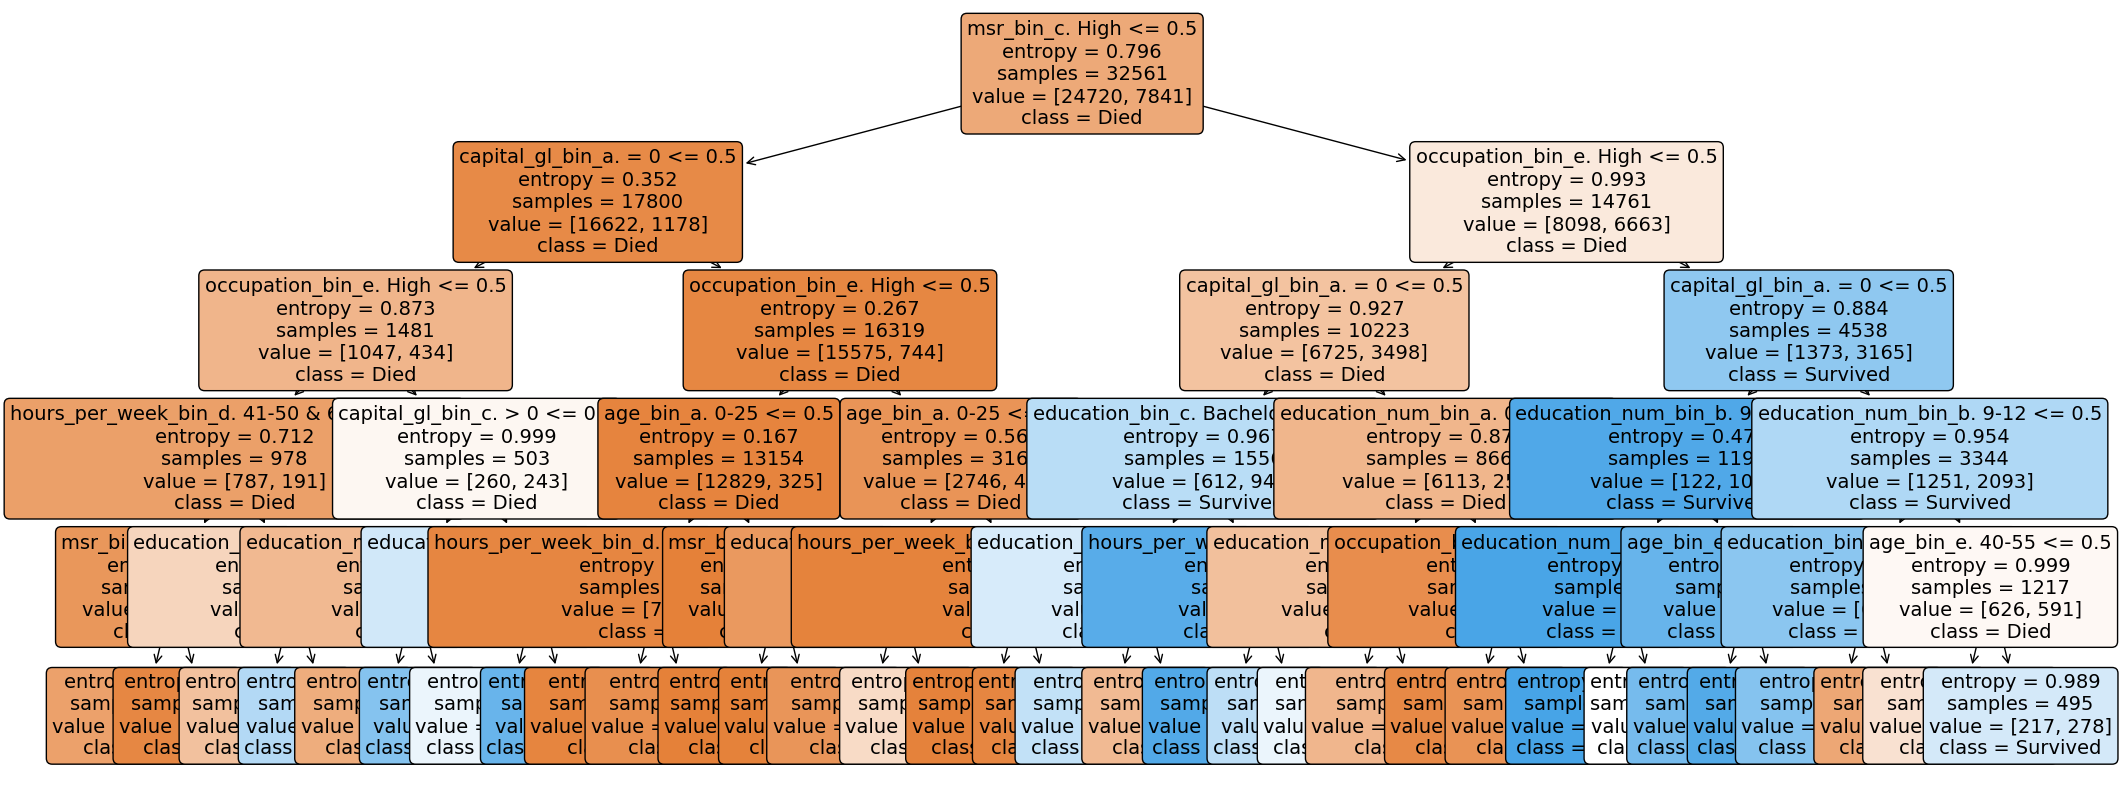

In [118]:
#Maximum Depth

# Fit a decision tree with max_features=0.5
#from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=101, max_features=None, min_samples_leaf=1)
dtree = dtree.fit(X_train, y_train)
y_pred=dtree.predict(X_test)

#from sklearn.tree import plot_tree
#import matplotlib.pyplot as plt

# check for the sklearn version
#import sklearn
print(sklearn.__version__)

plt.figure(figsize=(25,10))
a = plot_tree(dtree, feature_names=list(X_train), class_names=['Died', 'Survived'], 
              filled=True, rounded=True, fontsize=14)

In [119]:
from sklearn.metrics import confusion_matrix
Y_pred = dtree.predict (X_test)
cm = confusion_matrix(y_test, Y_pred)
print (cm)


# Predict the target values for the test set
Y_pred = dtree.predict (X_test)

# Evaluate the performance of the model
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Predict the target values for the test set
Y_pred = dtree.predict (X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, Y_pred)
print("Accuracy:", accuracy)

# Calculate the F1 score of the model
f1 = f1_score(y_test, Y_pred, average= 'weighted')
print ("F1 score:", f1)

# Calculate the precision of the model
precision = precision_score(y_test, Y_pred, average='weighted')
print("Precision:", precision)

# Calculate the recall of the model
recall = recall_score(y_test, Y_pred, average= 'weighted')
print("Recall:", recall)


[[22603  2117]
 [ 3277  4564]]
Accuracy: 0.8343416971223242
F1 score: 0.8296242536336825
Precision: 0.8275641044622113
Recall: 0.8343416971223242


##### Q.3 Decision Tree Hyper-parameter variation vs. performance

Before training a decision tree, hyperparameters determine its structure, including its maximum depth and minimum split sample size. These hyperparameters affect decision tree accuracy and performance. Hyperparameter variation optimizes decision tree performance by changing hyperparameters to find optimal values.

# 6. Visualize Your Best Decision Tree using GraphViz

In [120]:
import sklearn.datasets as datasets
import pandas as pd
iris=datasets.load_iris()
df=pd.DataFrame(iris.data, columns=iris.feature_names)
y=iris.target

In [127]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(df,y)

DecisionTreeClassifier()

In [125]:
#pip install pydotplus

     -------------------------------------- 278.7/278.7 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24554 sha256=d3c657b6ce8d683fd031929d95f963431b9cabc3f96a5d932a62f96af043d8b7
  Stored in directory: c:\users\diego.barrera\appdata\local\pip\cache\wheels\89\e5\de\6966007cf223872eedfbebbe0e074534e72e9128c8fd4b55eb
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


In [135]:
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus

dot_data = export_graphviz(dtree, out_file=None, 
                           feature_names=list(accuracy),
                           class_names=['Died', 'Survived'],  
                           filled=True, rounded=True,  
                           special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

TypeError: 'numpy.float64' object is not iterable

In [136]:
#Dtree1 = 0.8244218543656522
#Dtree2 = 0.8142256073216425
#Dtree3 = 0.8244218543656522 
#Dtree4 = 0.8343416971223242

#Based on these accuracy scores, the most accurate decision tree was the maximum depth tree

# 7. Conclusion

##### Q.4 How long was your total run time to train the best model? 

##### Q.5 Did you find the BEST TREE? 

The best tree was the maximum depth tree

##### Q.6 Write your observations from the visualization of the best tree

##### Q.7 Will this Tree “overfit”?

# 8. Prediction using your “trained” Decision Tree Model

##### Q.8 What is the probability that your prediction for this person is correct?

# 9. Deliverables